In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
pd.pandas.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("big_mart_sales.csv")
data.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## DATA CLEANING

In [10]:
#Creating new features containing various imputation method for the Item weight
data["Item_Median_Imputed"] = data["Item_Weight"].fillna(data["Item_Weight"].median())
data["Item_Mean_Imputed"] = data["Item_Weight"].fillna(data["Item_Weight"].mean())
data["Item_weight_interpolated"] = data["Item_Weight"].interpolate("linear")

In [13]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors = 10, weights = "distance")
data["Item_knn_imputed"] = knn.fit_transform(data[["Item_Weight"]], ).ravel()

In [14]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Median_Imputed             0
Item_Mean_Imputed               0
Item_weight_interpolated        0
Item_knn_imputed                0
dtype: int64

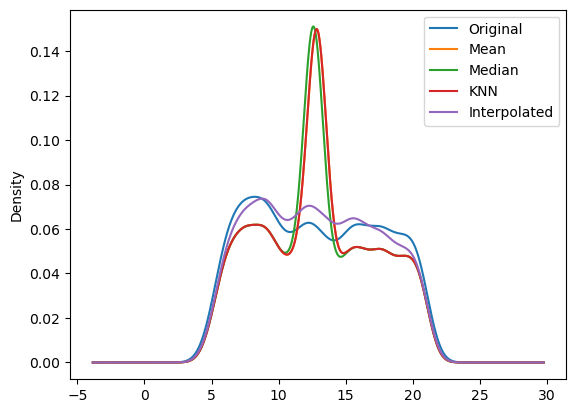

In [17]:
#Plotting a kde plot to check for the distribution of each weight feature and compare with the original
data["Item_Weight"].plot(kind = "kde", label = "Original")
data["Item_Mean_Imputed"].plot(kind = "kde", label = "Mean")
data["Item_Median_Imputed"].plot(kind = "kde", label = "Median")
data["Item_knn_imputed"].plot(kind = "kde", label = "KNN")
data["Item_weight_interpolated"].plot(kind = "kde", label = "Interpolated")
plt.legend()
plt.show()

#### This plot shows that the interpolated weight has closely same relationship with the original, hence, will be used for imputation.

In [18]:
data["Item_Weight"] = data["Item_Weight"].interpolate("linear")
data = data.drop(["Item_Mean_Imputed", "Item_Median_Imputed", "Item_knn_imputed"], axis = 1)
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_weight_interpolated        0
dtype: int64

In [20]:
data["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [23]:
#Checking for the mode of otlet size wrt to the outlet type
mode_outlet = data.pivot_table(values = "Outlet_Size", columns = "Outlet_Type", aggfunc = (lambda x : x.mode()[0]))
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [30]:
data_nan = data[data["Outlet_Size"].isna()]
data_nan

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_interpolated
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,16.200
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,19.200
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,13.000
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,5.925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688,8.420
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646,11.350
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804,8.100
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232,15.000


In [35]:
def impute_size(row):
    if row["Outlet_Type"] == "Grocery Store":
        return "Small"
    elif row["Outlet_Type"] == "Supermarket Type1":
        return "Small"
    elif row["Outlet_Type"] == "Supermarket Type2":
        return "Medium"
    elif row["Outlet_Type"] == "Supermarket Type3":
        return "Medium"
data_nan["Outlet_Size"] = data_nan.apply(impute_size, axis = 1)

In [38]:
data2 = data.dropna(axis = 0)
print(data.shape)
print(data2.shape)
print(data_nan.shape)

(8523, 13)
(6113, 13)
(2410, 13)


In [42]:
#Creating a new dataframe that contains the imputed nan values of outlet size (data_nan) and the original data with the rows with null values deleted(data2)
final_data = pd.concat([data2, data_nan], axis = 0).reset_index(drop = True)
final_data.shape

(8523, 13)

In [43]:
final_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_weight_interpolated     0
dtype: int64

In [45]:
import datetime as dt
final_data["Item_Age"] = dt.datetime.today().year - final_data["Outlet_Establishment_Year"]
final_data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_interpolated,Item_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,16


In [49]:
final_data["Item_Identifier"] = final_data['Item_Identifier'].apply(lambda x : x[0:2])
final_data["Item_Identifier"].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [50]:
final_data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'reg', 'LF'], dtype=object)

In [53]:
# Mapping values from item fat content and item identifier to new values
final_data["Item_Fat_Content"] = final_data["Item_Fat_Content"].map({"Low Fat" : 'Low Fat', "low fat" : "Low Fat", "LF" : "Low Fat", "reg" : "Regular", "Regular" : "Regular"})
final_data["Item_Identifier"] = final_data['Item_Identifier'].map({"FD" : "Food", "DR": "Drink", "NC" : "Non-Consumable"})
final_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_interpolated,Item_Age
0,Food,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,26
1,Drink,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,16
2,Food,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,26
3,Non-Consumable,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,38
4,Food,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,10.395,16


## UNIVARIATE DATA EXPLORATION

* ### Categorical variables

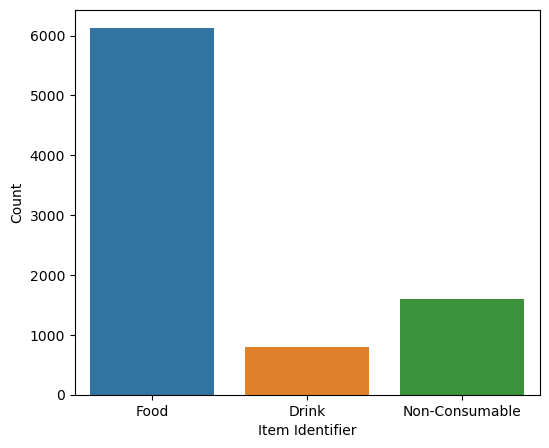

In [55]:
plt.figure(figsize = (6, 5))
sns.countplot(data = final_data, x = "Item_Identifier")
plt.xlabel("Item Identifier")
plt.ylabel("Count")
plt.show()

* ##### It can be seen that food is the most item purchased with drink being the least

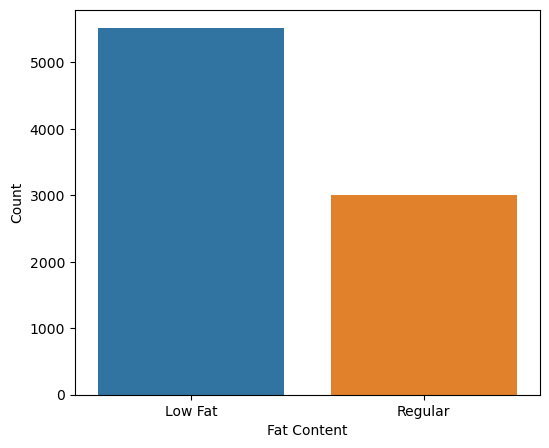

In [58]:
plt.figure(figsize = (6, 5))
sns.countplot(data = final_data, x = "Item_Fat_Content")
plt.xlabel("Fat Content")
plt.ylabel("Count")
plt.show()

* ##### It can be seen that most of the item purchased has low fat content

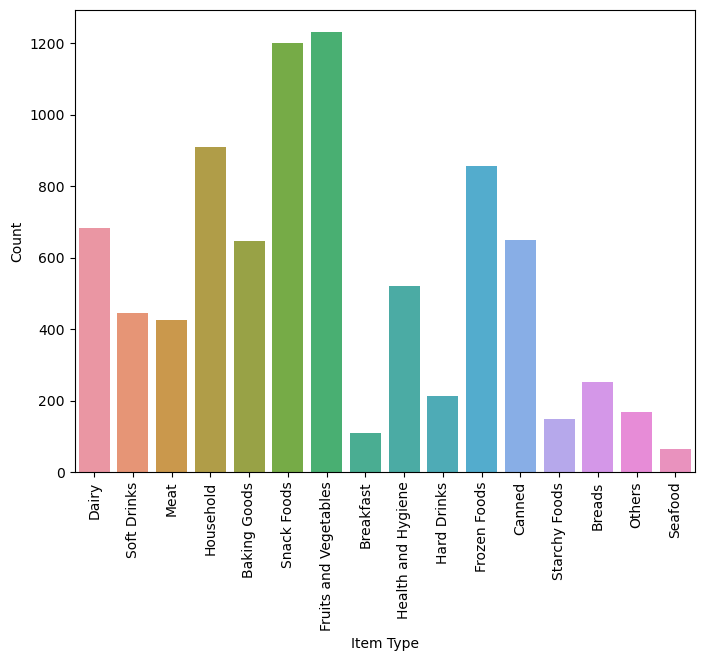

In [61]:
plt.figure(figsize = (8, 6))
sns.countplot(data = final_data, x = "Item_Type")
plt.xlabel("Item Type")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

* ##### It can be seen that Fruits and Vegetables are the most item bought with Seafood being the least

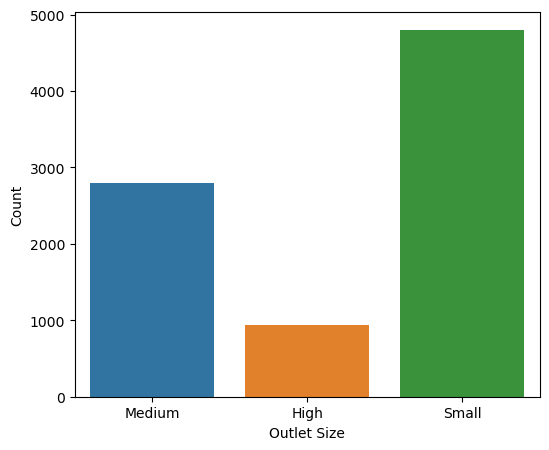

In [62]:
plt.figure(figsize = (6, 5))
sns.countplot(data = final_data, x = "Outlet_Size")
plt.xlabel("Outlet Size")
plt.ylabel("Count")
plt.show()

* ##### Most Item purshased have small outlet size

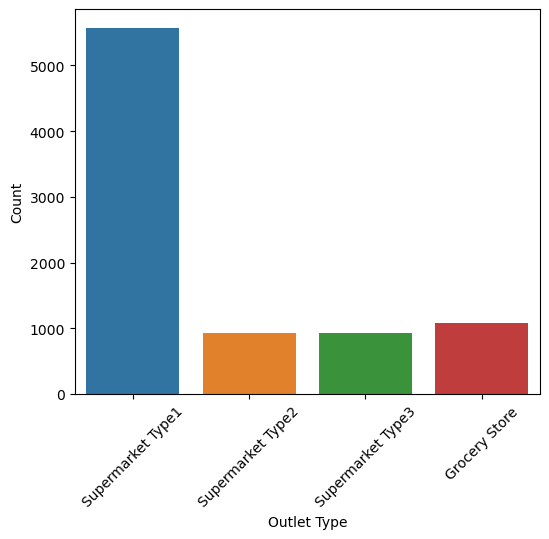

In [64]:
plt.figure(figsize = (6, 5))
sns.countplot(data = final_data, x = "Outlet_Type")
plt.xlabel("Outlet Type")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

* ##### Most item purchased are from supermarket type 1, with least coming from type 2 and 3

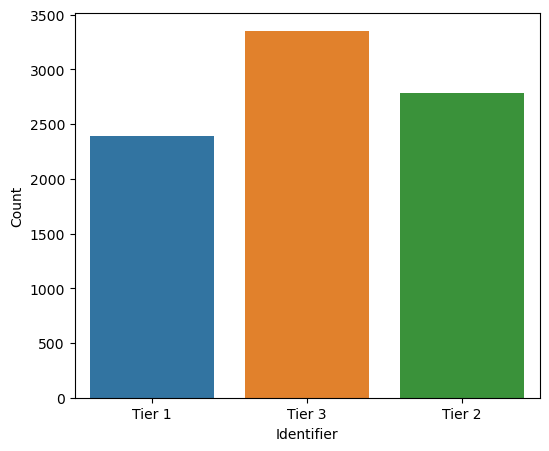

In [65]:
plt.figure(figsize = (6, 5))
sns.countplot(data = final_data, x = "Outlet_Location_Type")
plt.xlabel("Identifier")
plt.ylabel("Count")
plt.show()

* ##### Most item purchased are of Tier 3

In [66]:
final_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_weight_interpolated,Item_Age
0,Food,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,26
1,Drink,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920,16
2,Food,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500,26
3,Non-Consumable,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930,38
4,Food,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,10.395,16


* ### Continuous variables

<Axes: xlabel='Item_Weight', ylabel='Density'>

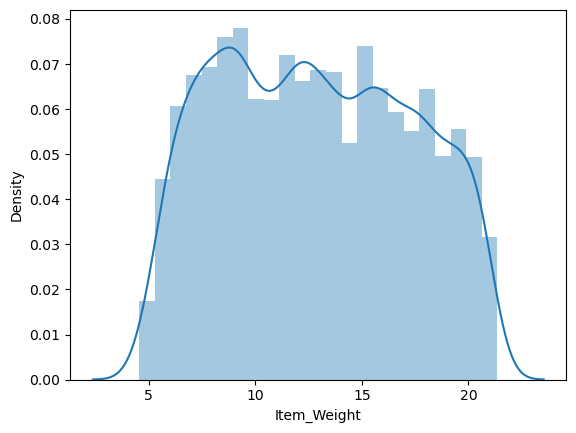

In [68]:
sns.distplot(a = final_data["Item_Weight"])

* ##### Item weight is slightly normally distributed

<Axes: xlabel='Item_Visibility', ylabel='Density'>

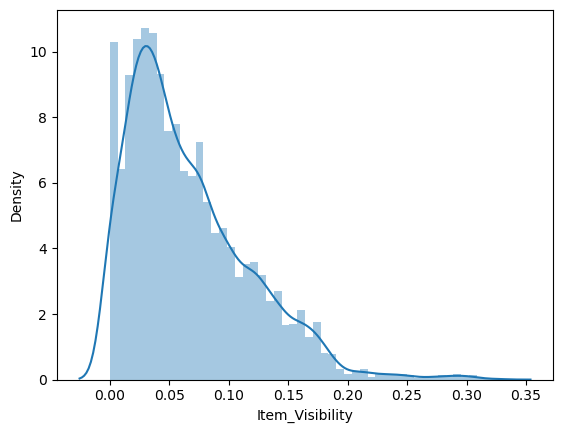

In [69]:
sns.distplot(a = final_data["Item_Visibility"])

* ##### Item visibility has a right skewed distributon

<Axes: xlabel='Item_MRP', ylabel='Density'>

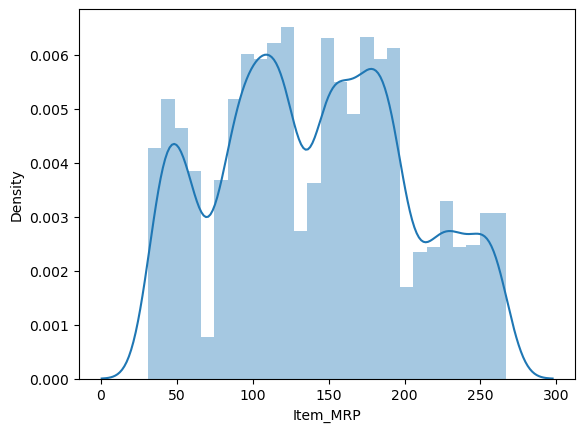

In [70]:
sns.distplot(a = final_data["Item_MRP"])

* ##### Item MRP is also slighly normally distributed

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Density'>

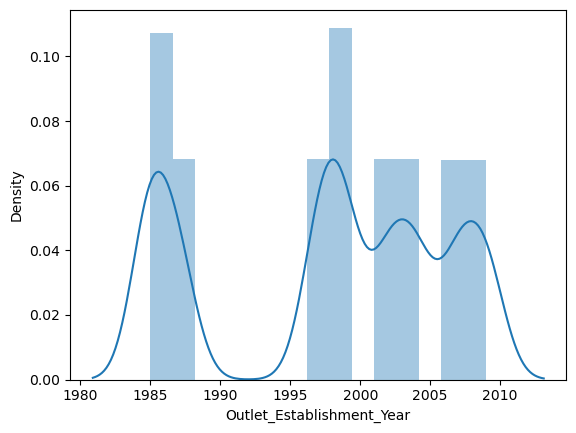

In [71]:
sns.distplot(final_data["Outlet_Establishment_Year"])

* ##### This shows that there are no item from year 1990 to 1995

<Axes: xlabel='Item_Age', ylabel='Density'>

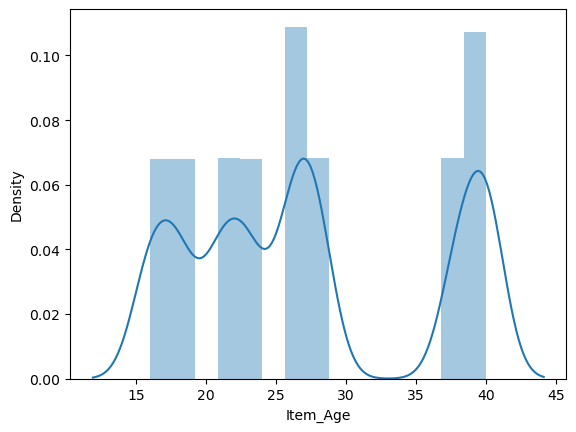

In [73]:
sns.distplot(final_data["Item_Age"])

* ##### This shows that there are no item of age 30 to 35

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

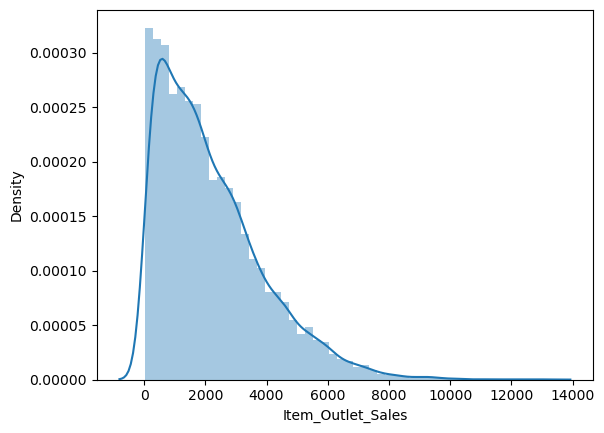

In [74]:
sns.distplot(final_data['Item_Outlet_Sales'])

* ##### This shows that the item sales price also has a right skewed distribution

## BIVARIATE DATA EXPLORATION

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

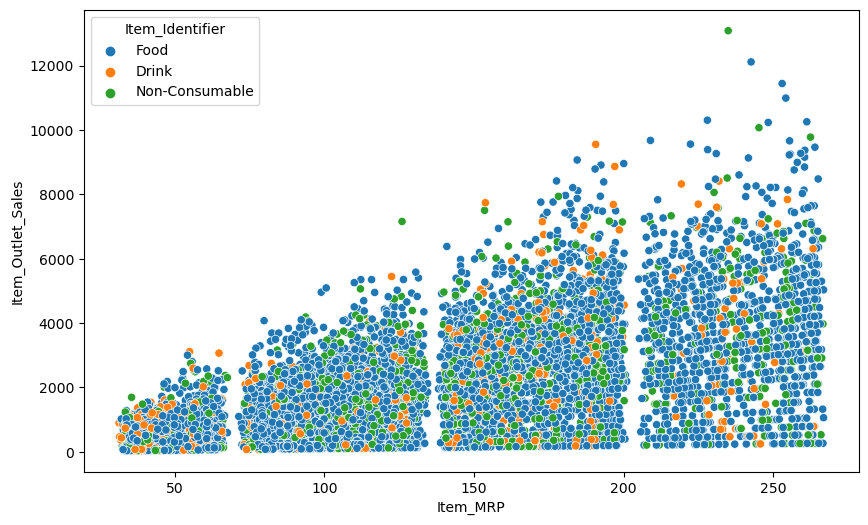

In [77]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = final_data, x = 'Item_MRP', y = "Item_Outlet_Sales", hue = "Item_Identifier")

* ##### Item sales price and item mrp have a positive linear relationship, with the food having the highest distribution

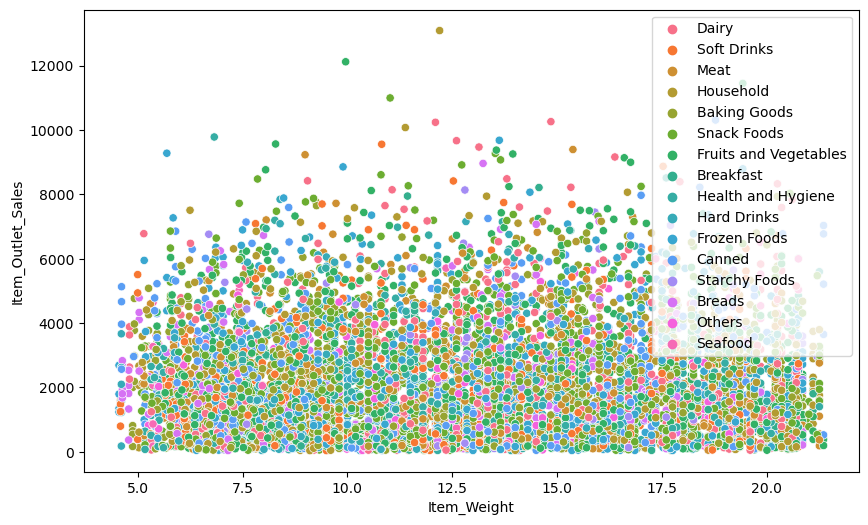

In [78]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = final_data, x = 'Item_Weight', y = "Item_Outlet_Sales", hue = "Item_Type")
plt.legend(loc = 1)


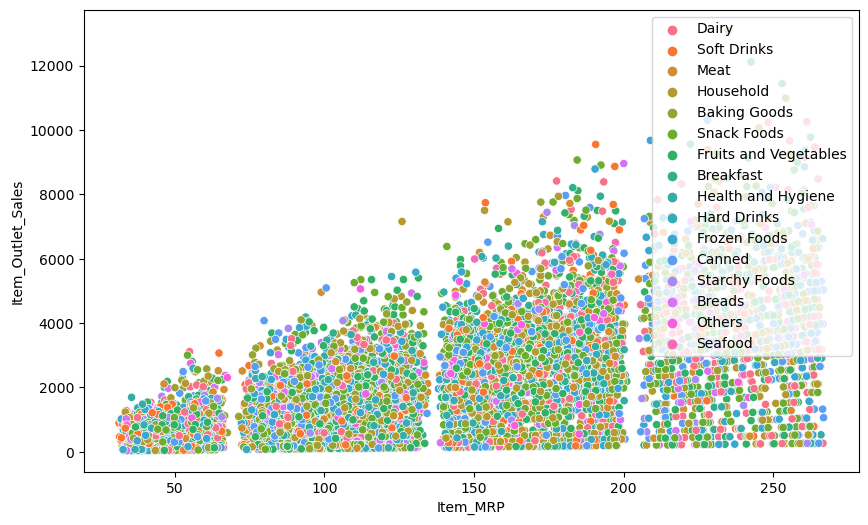

In [82]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = final_data, x = 'Item_MRP', y = "Item_Outlet_Sales", hue = "Item_Type")
plt.legend(loc = 1)


* ##### Item sales price and item mrp have a positive linear relationship, with the fruits and vegetables having the highest distribution

## FEATURE ENGINEERING

* ### Feature Encoding

In [80]:
# Performing label encoding on features
final_data["Item_Identifier"] = final_data["Item_Identifier"].map({"Food" : 0, "Drink" : 1, 'Non-Consumable' : 2})
final_data['Item_Fat_Content'] = final_data["Item_Fat_Content"].map({"Low Fat": 0, "Regular" : 1})
final_data["Outlet_Size"] = final_data["Outlet_Size"].map({"Small" : 0, "Medium" : 1, 'High' : 2})
final_data["Outlet_Location_Type"] = final_data["Outlet_Location_Type"].map({"Tier 1" : 1, "Tier 2" : 1, "Tier 3" : 3})

In [87]:
#Perfroming one hot encoding on Outlet type and Item type
final_data = pd.get_dummies(data = final_data, columns = ["Outlet_Type", 'Item_Type'], dtype = "int", drop_first = True)
final_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_weight_interpolated,Item_Age,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0,9.300,0,0.016047,249.8092,OUT049,1999,1,1,3735.1380,9.300,26,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,5.920,1,0.019278,48.2692,OUT018,2009,1,3,443.4228,5.920,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,17.500,0,0.016760,141.6180,OUT049,1999,1,1,2097.2700,17.500,26,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2,8.930,0,0.000000,53.8614,OUT013,1987,2,3,994.7052,8.930,38,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,10.395,1,0.000000,51.4008,OUT018,2009,1,3,556.6088,10.395,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
#Performing one hot encoding on Outlet identifier
final_data = pd.get_dummies(data = final_data, columns = ["Outlet_Identifier"], drop_first = True)
#Dropping the Item weight interpolated
final_data = final_data.drop("Item_weight_interpolated", axis = 1)


In [119]:
final_data = final_data.drop("Outlet_Establishment_Year", axis = 1)

* ### Feature Scaling

In [122]:
from sklearn.preprocessing import MinMaxScaler
X = final_data.drop("Item_Outlet_Sales", axis = 1)
y = final_data["Item_Outlet_Sales"]
scaler = MinMaxScaler()
# Scaling the independent features on a scale of 0-1
X_scaled = scaler.fit_transform(final_data)


In [124]:
## Splitting dependent and independent features into train and test data
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X_scaled, y, test_size = 0.3)


In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error as MAE, mean_squared_log_error as MSLE, mean_squared_error as MSE
#Performing the 5 fold cross validation score on the train data with RandomForestRegressor as algorithm
rfc = RandomForestRegressor()
rfc.fit(train_X, train_y)
rfc_scores = cross_val_score(rfc, train_X, train_y, cv = 5)
rfc_scores.mean()

0.9996246007377764

In [132]:
#Performing the 5 fold cross validation score on the train data with LinearRegressor as algorithm
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)
lin_scores = cross_val_score(lin_reg, train_X, train_y, cv = 5)
lin_scores.mean()

1.0

In [145]:
#Finally predicting the test data
pred = lin_reg.predict(val_X)
print(f"R_squared score = {r2_score(val_y, pred)}")
print(f"Root Mean Squared Error = {np.sqrt(MSE(val_y, pred))}")

R_squared score = 1.0
Root Mean Squared Error = 5.498298633186145e-12


Text(0.5, 1.0, 'Relationship between the predicted prices and the actual prices on the test data')

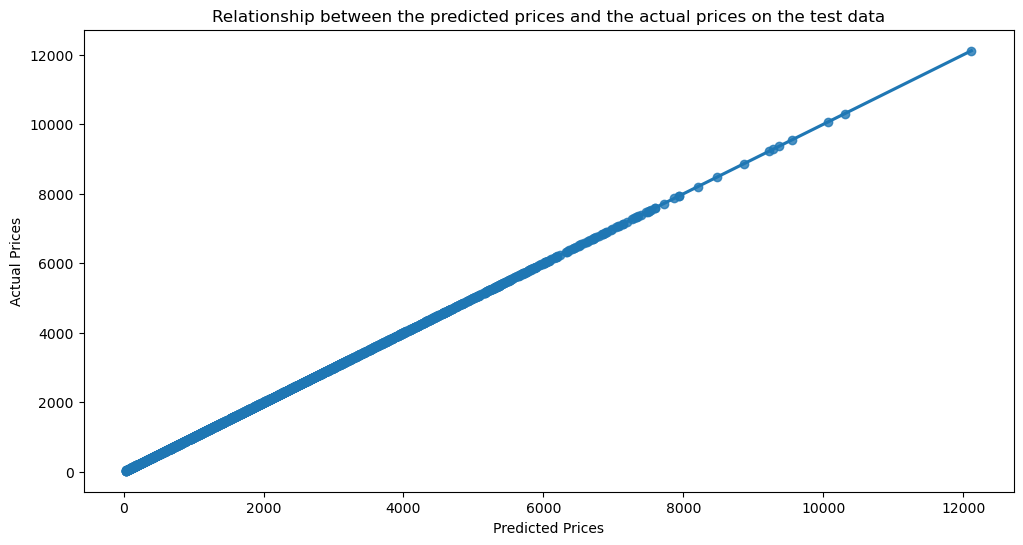

In [152]:
# Plotting the scatter plot to see the relationship between the actual sales prices and predicted ones on the test data
plt.figure(figsize = (12, 6))
sns.regplot(x = pred, y = val_y)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.title("Relationship between the predicted prices and the actual prices on the test data")

In [153]:
train_pred = lin_reg.predict(train_X)
print(f"R_squared score = {r2_score(train_y, train_pred)}")
print(f"Root Mean Squared Error = {np.sqrt(MSE(train_y, train_pred))}")


R_squared score = 1.0
Root Mean Squared Error = 5.4306910830440996e-12


Text(0.5, 1.0, 'Relationship between the predicted prices and the actual prices on the train data')

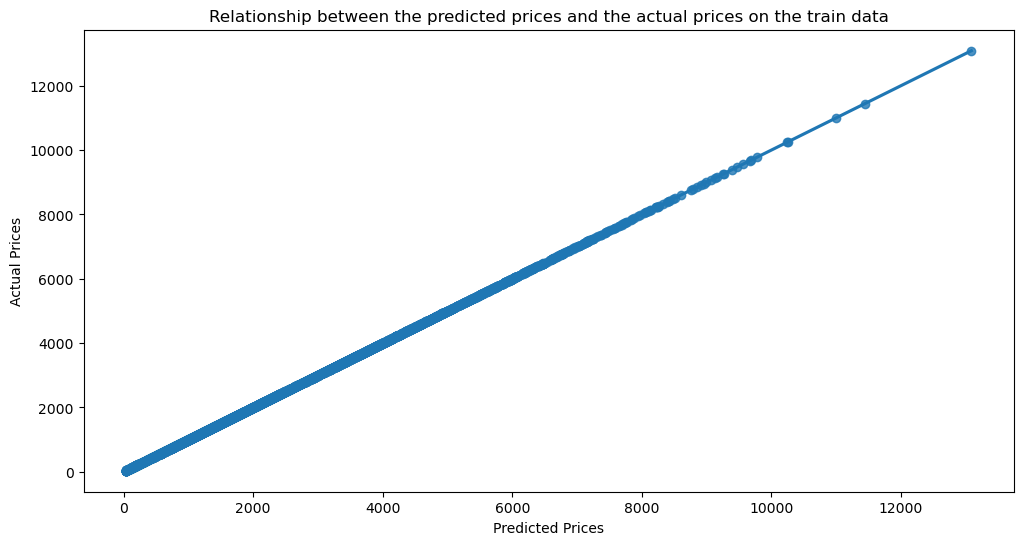

In [154]:
# Plotting the scatter plot to see the relationship between the actual sales prices and predicted ones on the train data
plt.figure(figsize = (12, 6))
sns.regplot(x = train_pred, y = train_y)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.title("Relationship between the predicted prices and the actual prices on the train data")

* ## The two regression plots show that the Linear regression model is a generalized model